# IMBD Top Movies 

## Load the dataset and import librarys:

In [8]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset
file_path = 'movies.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",Drama,9.3,142 min,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,869,913",$28.34M
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,152 min,9.0,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","2,851,842",$534.86M
2,Inception,2010,A thief who steals corporate secrets through t...,"Action, Adventure, Sci-Fi",8.8,148 min,8.8,74.0,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","2,532,959",$292.58M
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,Drama,8.8,139 min,8.8,67.0,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier","2,305,364",$37.03M
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",8.9,154 min,8.9,95.0,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...","2,204,248",$107.93M




# Data Processing and Cleaning: 

## Task: Data Cleaning:
### Date: 16-March-2024 ,Done By: Deem Alshaye

### Handling missing values:

In [9]:
# Step 1: Check for Missing Values
data.isnull().sum()



Title            0
Release year     0
Plot summary     0
Genre            0
Rating           0
Runtime          0
IMDb rating      0
Metascore       27
Director         0
Stars            0
Votes            0
Gross           39
dtype: int64

What was done: Checked for the presence of missing values in each column of the dataset.
Why it was necessary: Identifying missing values is crucial to assess the quality of the data and decide on appropriate handling techniques.

###  Data Type Conversion

In [10]:
# Step 2: Data Type Conversion
# Convert 'Release year' to integer
data['Release year'] = pd.to_numeric(data['Release year'], errors='coerce')

# Convert 'IMDb rating' to float
data['IMDb rating'] = pd.to_numeric(data['IMDb rating'], errors='coerce')

# Convert 'votes' to integer
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)



What was done: Converted the 'Release year' column to integer and 'Votes' column to integer and the 'IMDb rating' column to float.
Why it was necessary: Ensuring that data types are consistent with the data they represent is important for analysis and computation. For example, the release year should be an integer, and ratings should be floating-point numbers.

### Remove Unnecessary Characters:

In [11]:
# Step 3: Remove Unnecessary Characters
# Remove 'min' from 'Runtime' and convert to integer
data['Runtime'] = data['Runtime'].str.replace(' min', '').astype(float)

# Remove '$' and 'M' from 'Gross', convert to float, and multiply by 1 million
data['Gross'] = data['Gross'].str.replace('[\$\,M]', '', regex=True).astype(float) * 1e6


What was done: Removed non-numeric characters from the 'Runtime' and 'Gross' columns and converted them to appropriate numeric types.
Why it was necessary: Numeric columns containing non-numeric characters cannot be used for mathematical operations. Cleaning these columns allows for accurate calculations and analysis.

### Splitting Columns 

In [12]:
# Step 4: Splitting Columns 
data['Stars'] = data['Stars'].str.split(', ')
# Split the 'Genre' column into a list of genres
data['Genre'] = data['Genre'].str.split(', ')


What was done: Split the 'Stars' column into a list of individual names.
Why it was necessary: The 'Stars' column contained multiple names in a single string, which is not ideal for analysis. Splitting the names into a list allows for easier manipulation and analysis of individual names.

### Handling missing values

In [13]:
# Handling missing values

# For 'Metascore', we'll fill missing values with the median
metascore_median = data['Metascore'].median()
data['Metascore'].fillna(metascore_median, inplace=True)

# For 'Gross', we'll fill missing values with the median
gross_median = data['Gross'].median()
data['Gross'].fillna(gross_median, inplace=True)

# Fill missing values in 'Release year' with the median
release_year_median = data['Release year'].median()
data['Release year'].fillna(release_year_median, inplace=True)

# Check if there are any missing values left
data.isnull().sum()


Title           0
Release year    0
Plot summary    0
Genre           0
Rating          0
Runtime         0
IMDb rating     0
Metascore       0
Director        0
Stars           0
Votes           0
Gross           0
dtype: int64

What was done: Filled missing values in the 'Metascore', 'Gross', and 'Release year' columns with their respective median values. Why it was necessary: Missing values can affect the results of analyses and computations. Filling them with a central tendency measure is a common practice to maintain the overall distribution of the data.

### Extracting

In [14]:
# Extract four-digit year from each value in the "Release year" column
data['Release year'] = data['Release year'].astype(str).str.extract(r'(\d{4})')

# Convert the extracted years to integers
data['Release year'] = data['Release year'].astype(int)


# Verify the changes by printing unique values in ascending order
print(sorted(data['Release year'].unique()))

[1921, 1922, 1925, 1927, 1931, 1933, 1934, 1936, 1937, 1939, 1940, 1941, 1942, 1944, 1946, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


What was done: The code snippet extracts the four-digit year from each value in the "Release year" column of the DataFrame `data` and assigns it back to the same column. It uses the `astype(str)` method to convert the values to strings, and then applies the `str.extract(r'(\d{4})')` method with a regular expression pattern `(\d{4})` to extract the four-digit year and then convert it into integer.

Why it was necessary: This operation is necessary to ensure that the "Release year" column contains only the year information in a consistent format (four digits). This can be useful for various data analysis and visualization tasks where having the year in a standardized format is important.

### cleaned data:

In [15]:
# Display the cleaned dataset 
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",[Drama],9.3,142.0,9.3,82.0,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2869913,28340000.0
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,152.0,9.0,84.0,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2851842,534860000.0
2,Inception,2010,A thief who steals corporate secrets through t...,"[Action, Adventure, Sci-Fi]",8.8,148.0,8.8,74.0,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",2532959,292580000.0
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,[Drama],8.8,139.0,8.8,67.0,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",2305364,37030000.0
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","[Crime, Drama]",8.9,154.0,8.9,95.0,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",2204248,107930000.0


## Task: Preprocessing: 
### Date: 20-March-2024 ,Done By: Arwa  Mesloub
###  Normilazation:

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object with the custom range (1 to 10)
custom_scaler = MinMaxScaler(feature_range=(1, 10))

# Normalize the specified columns in the original 'data' DataFrame
columns_to_normalize = ['Metascore', 'Votes', 'Gross']
data[columns_to_normalize] = custom_scaler.fit_transform(data[columns_to_normalize])
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",[Drama],9.3,142.0,9.3,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,152.0,9.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261
2,Inception,2010,A thief who steals corporate secrets through t...,"[Action, Adventure, Sci-Fi]",8.8,148.0,8.8,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,[Drama],8.8,139.0,8.8,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","[Crime, Drama]",8.9,154.0,8.9,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057


What was done: The 'MetaScore', 'Votes', and 'Gross' columns were normalized to a scale of 1-10.

Why it was necessary: the normalization was done to ensure that the data is presented consistently for comparison and visualization. Since IMDB ratings typically fall within the 1, 10 range aligning the 'MetaScore' 'Votes' and 'Gross columns, on the scale makes it easier to analyze and understand. By bringing all values to a scale it simplifies the process of gauging the significance or size of these variables relative, to each other.

###  Discretization:

In [17]:


# Drop rows with NaN values in 'IMDb rating' column
data = data.dropna(subset=['IMDb rating'])

# Define the bins and labels for discretization
bins = [0, 6.9, 8.4, 10]
labels = ['Low', 'Medium', 'High']

# Discretize the 'IMDb rating' column
data['Rating Category'] = pd.cut(data['IMDb rating'], bins=bins, labels=labels, include_lowest=True)

# Display the updated dataset with the new 'Rating Category' column
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",[Drama],9.3,142.0,9.3,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,152.0,9.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010,A thief who steals corporate secrets through t...,"[Action, Adventure, Sci-Fi]",8.8,148.0,8.8,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,[Drama],8.8,139.0,8.8,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","[Crime, Drama]",8.9,154.0,8.9,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


Was done:  we discretized 'IMDb rating' into the categories (low, medium, high ) 'Low' for ratings below 7.0, 'Medium' for ratings between 7.0 and 8.4, and 'High' for ratings 8.5 and above. Why it was necessary: provides a simplified representation of the ratings, allowing for easier analysis and comparison. we can identify patterns within each category.

### Feature Selection:

In [18]:
# Drop the 'Plot summary' and 'IMDb rating' columns
data.drop(columns=['Plot summary', 'IMDb rating'], inplace=True)


data.head()

,Title,Release year,Genre,Rating,Runtime,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994,[Drama],9.3,142.0,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008,"[Action, Crime, Drama]",9.0,152.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,148.0,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999,[Drama],8.8,139.0,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994,"[Crime, Drama]",8.9,154.0,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


What was done: The 'Plot Summary'and 'IMDb rating' columns was dropped from the dataset.

Why it was necessary: The 'Plot Summary' column was deemed not helpful for the analysis or modeling objectives. Removing it simplifies the dataset, reducing complexity and focusing on more relevant features,and  The 'IMDb rating' column was dropped because it was a duplicate of the 'Rating' column.

## TASK: Statistical Summaries & EDA
## Done by : Leen Alharbi
## Date: 20-3-2024

In [19]:
#Data visualization and analysis
#Statistical description of numerical columns
movie_DF= pd.DataFrame(data)
movie_DF.describe()

,Release year,Rating,Runtime,Metascore,Votes,Gross
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,2000.522784,7.006610,114.147722,6.239282,1.706129,1.784810
std,14.139624,0.847551,21.259413,1.713948,0.934589,0.819826
min,1921.000000,1.900000,64.000000,1.000000,1.000000,1.000000
25%,1997.000000,6.400000,99.000000,4.956044,1.170325,1.253859
50%,2004.000000,7.100000,111.000000,6.241758,1.385879,1.544088
75%,2009.000000,7.600000,126.000000,7.527473,1.823659,2.054737
max,2016.000000,9.300000,238.000000,10.000000,10.000000,10.000000


In [20]:
movie_DF.head()

,Title,Release year,Genre,Rating,Runtime,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994,[Drama],9.3,142.0,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008,"[Action, Crime, Drama]",9.0,152.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,148.0,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999,[Drama],8.8,139.0,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994,"[Crime, Drama]",8.9,154.0,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


In [21]:
#include other categorical columns
movie_DF.describe(include=['O']) 

,Title,Genre,Director,Stars
count,1997,1997,1997,1997
unique,1976,246,880,1980
top,Cinderella,"[Action, Adventure, Sci-Fi]",Steven Spielberg,"[Talia Shire, Burt Young, Carl Weathers]"
freq,2,90,23,3


In [23]:
movie_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Title            1997 non-null   object  
 1   Release year     1997 non-null   int64   
 2   Genre            1997 non-null   object  
 3   Rating           1997 non-null   float64 
 4   Runtime          1997 non-null   float64 
 5   Metascore        1997 non-null   float64 
 6   Director         1997 non-null   object  
 7   Stars            1997 non-null   object  
 8   Votes            1997 non-null   float64 
 9   Gross            1997 non-null   float64 
 10  Rating Category  1997 non-null   category
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 158.2+ KB


In [24]:
movie_DF.columns

Index(['Title', 'Release year', 'Genre', 'Rating', 'Runtime', 'Metascore',
       'Director', 'Stars', 'Votes', 'Gross', 'Rating Category'],
      dtype='object')

## Statistical Summaries 

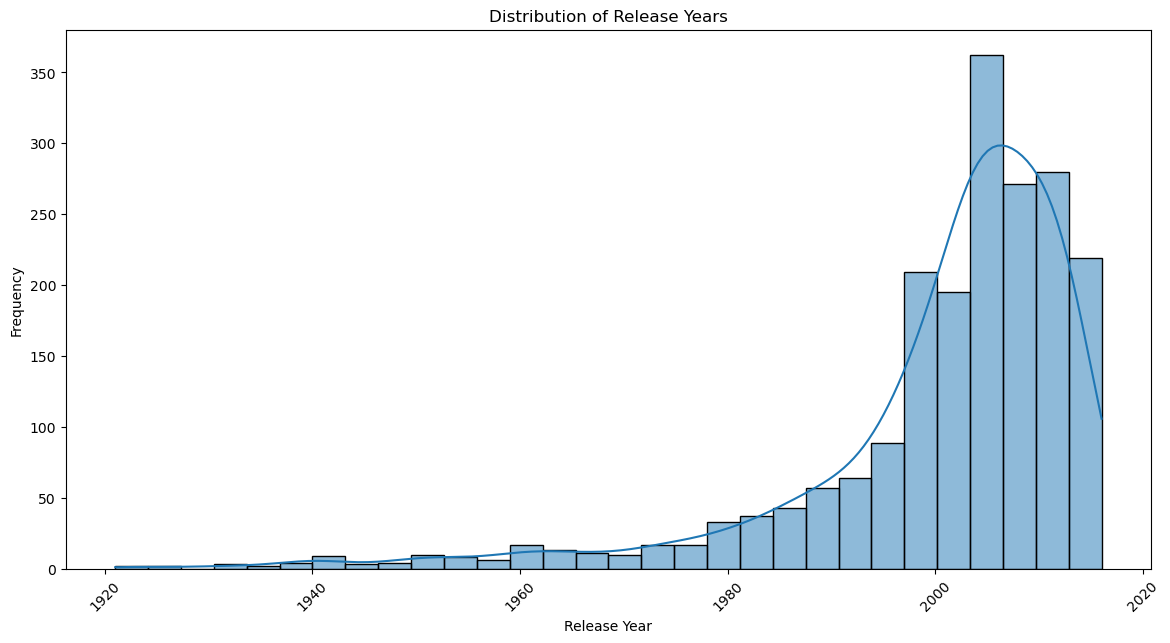

In [26]:
# Plot of Distribution of release year
release_years = data['Release year']

plt.figure(figsize=(14, 7))
sns.histplot(release_years, bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()






Increasing Trend Over Time: There is a clear increasing trend in the number of movies released over the years. The number of movies starts to grow more significantly in the latter half of the 20th century, with a noticeable surge from the 1990s onwards.

Peaks and Declines: There are distinct peaks in certain years, where the number of movies released is especially high, followed by declines. This could indicate years where the movie industry was particularly active or years that were significant for cinema in terms of output.

Recent Dominance: The most recent years in the dataset, which seem to be the late 2000s and early 2010s, dominate the dataset. This could suggest either a bias towards more recent movies in the dataset collection process or an actual increase in movie production in recent years.

Possible Data Collection Bias: The very steep decline in the number of movies at the end of the plot suggests that the data may be incomplete for the last year(s) in the dataset, or it might represent a cut-off in the data collection process.

Centennial Markings: The x-axis labels are cluttered and include what appears to be centennial markings (e.g., '1900', '2000'). This labeling could be due to an attempt to mark every year, but due to the number of years, the labels overlap and become unreadable.

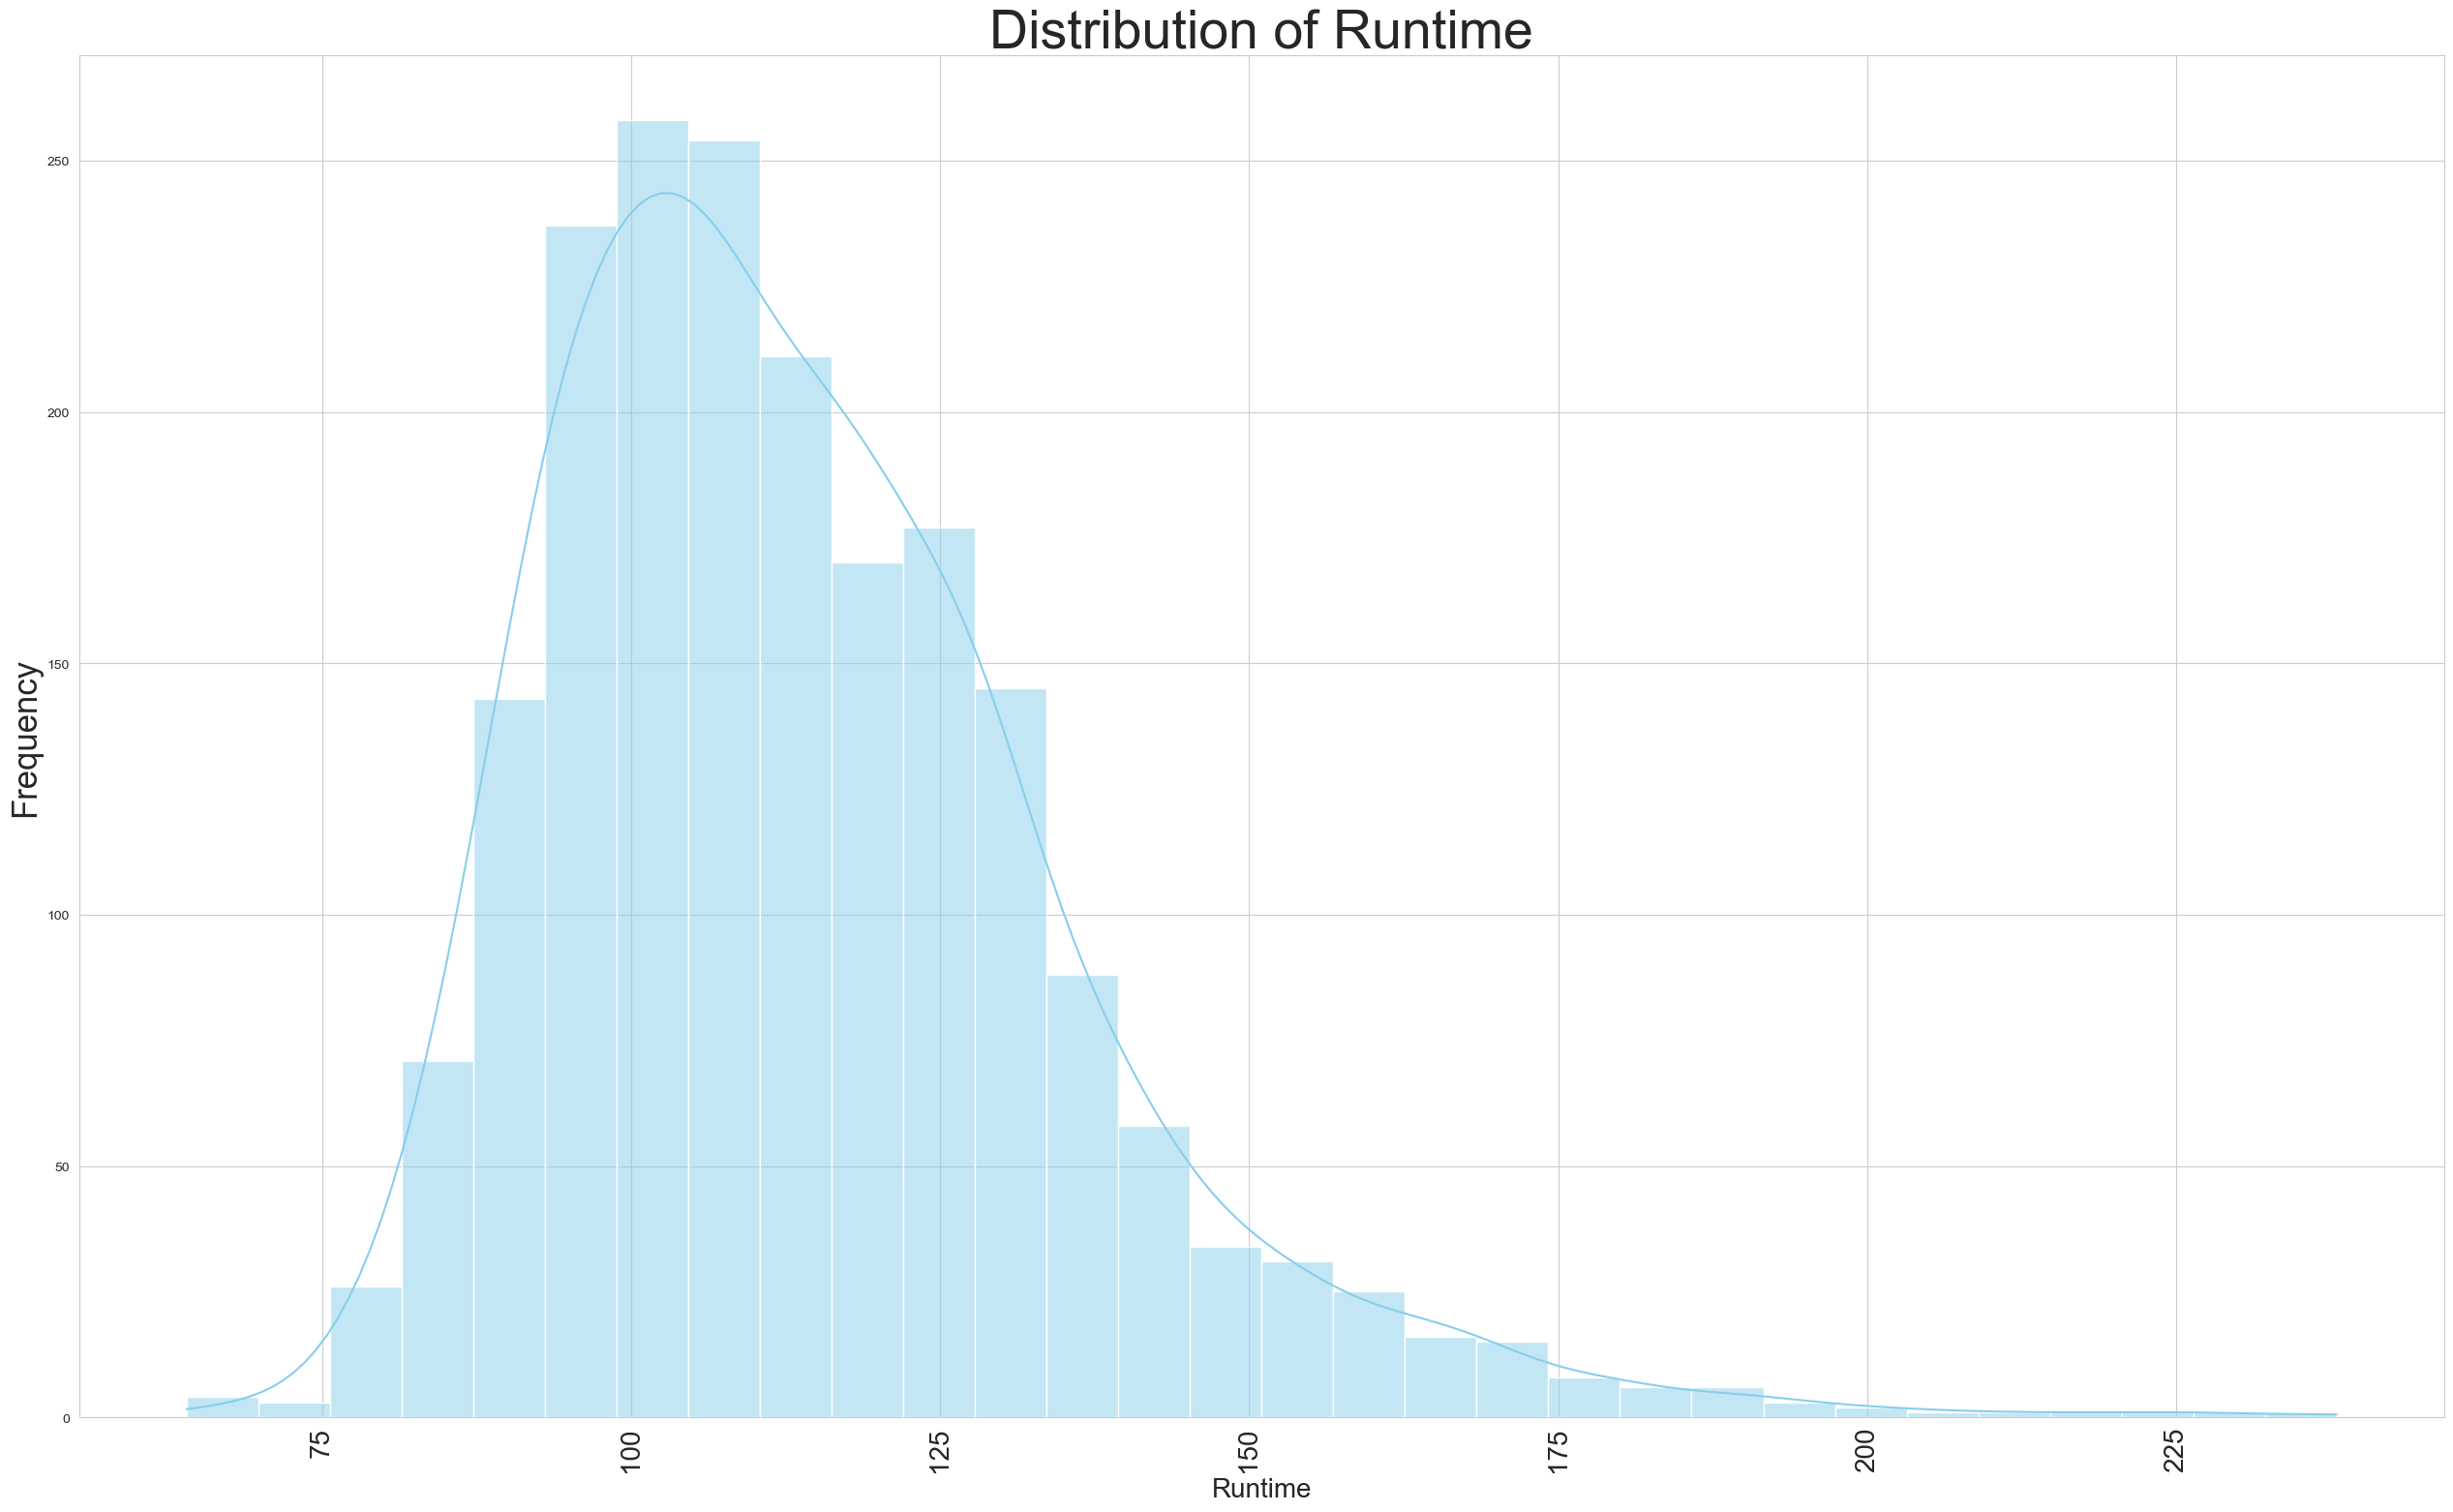

In [28]:
# Plot distribution of 'Runtime'
sns.set_style("whitegrid")


plt.figure(figsize=(50, 45))

plt.subplot(3, 2, 2)

sns.histplot(data=data, x='Runtime', bins=30, kde=True, color='skyblue')

plt.title('Distribution of Runtime', fontsize=40)
plt.xlabel('Runtime', fontsize=20) 
plt.ylabel('Frequency', fontsize=25)

plt.xticks(rotation=90, fontsize=20)

plt.tight_layout(pad=1.0)


plt.show()

Normal-like Distribution: The histogram shows what appears to be a roughly normal distribution of movie runtimes. There's a clear central peak with frequencies tapering off on either side. This indicates that most movies have a duration close to the average runtime, with fewer films at the extremes of very short or very long.

Most Common Runtimes: The peak of the distribution suggests that the most common movie runtimes are around the center of the dataset's range. Given standard film lengths, this is likely in the vicinity of 90 to 120 minutes, which is typical for feature-length films.

Long-Tail on the Right: There's a long tail to the right of the distribution, indicating that while most movies are of standard length, there's a number of films with significantly longer runtimes. These could be epic films, extended versions, or movies that are outliers in terms of content and structure.

Few Very Short or Very Long Films: There are relatively few very short (under 80 minutes) or very long (over 150 minutes) films, which reflects traditional movie industry standards and audience expectations

Text(0.5, 0, 'Metascore')

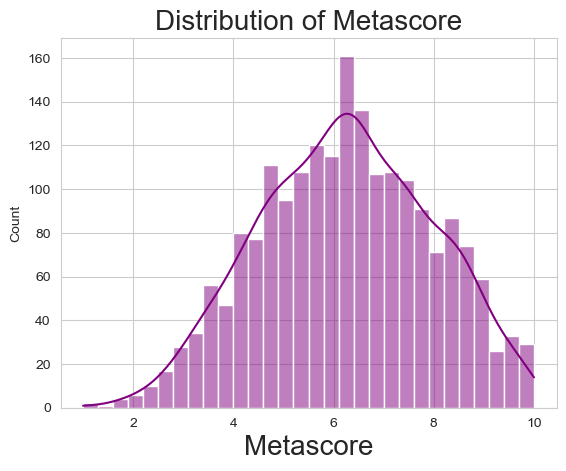

In [29]:
# Plot distribution of 'Metascore'

sns.histplot(data=data, x='Metascore', bins=30, kde=True, color='purple')

plt.title('Distribution of Metascore', fontsize=20)
plt.xlabel('Metascore', fontsize=20) 



Central Tendency: The distribution has a pronounced peak slightly above 5 on the Metascore scale. This peak indicates the most common range of scores that movies in this dataset received.

Skewness: The distribution seems to have a slight right skew, with a tail extending more toward the higher scores. This suggests that there are a few movies with very high Metascores compared to the rest.

Normality: Despite the skew, the overall shape of the distribution has a resemblance to a normal distribution, suggesting that Metascore values are fairly evenly spread around the mean.

Outliers: The peak at Metascore of 10 could indicate an outlier or a set of movies with exceptionally high scores, or it could be due to binning artifacts where the highest scores are lumped togethe

Text(0.5, 1.0, 'Distribution of Gross Revenue')

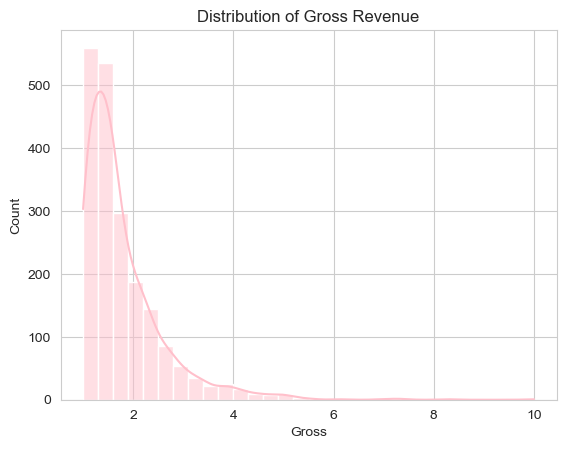

In [30]:
# Plot distribution of 'Gross'
sns.histplot(data=data, x='Gross', bins=30, kde=True, color='pink')
plt.title('Distribution of Gross Revenue')

The histogram for the distribution of gross revenue, assuming that 'Gross' is scaled in billions and the values range from 0 to 10, seems to indicate:

Right-Skewed Distribution: The graph shows that the gross revenue distribution is heavily skewed to the right, meaning there are a large number of movies that have relatively low earnings and a small number that have very high earnings.

Most Movies Earn Less: The peak at the lower end of the gross scale suggests that most movies earn on the lower side of the revenue spectrum.

Blockbusters Are Rare: The long tail to the right indicates that movies with extremely high gross revenues (blockbusters) are relatively rare compared to the total number of movies.

Kernel Density Estimate (KDE): The KDE line shows the probability density of the different gross revenues, emphasizing the skewness of the distribution.

Outliers Influence: The presence of outliers (the extremely high-grossing movies) has a significant impact on the shape of the distribution, pulling the mean to the right.

## Bar plot to discover trending genres among movies in the dataset

<Axes: title={'center': 'Top 10 Genres Among Movies'}>

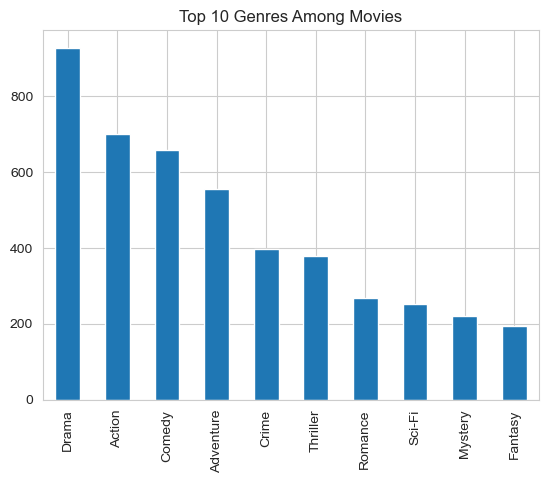

In [31]:
data_exploded = data.explode('Genre')


genre_counts = data_exploded['Genre'].value_counts()

top_10_genres = genre_counts.head(10)

top_10_genres.plot(kind='bar', title='Top 10 Genres Among Movies')

Drama Dominates: The genre with the highest count is Drama, indicating that it's the most prevalent genre among the movies in the dataset.

Action and Comedy Are Popular: Following Drama, Action and Comedy genres also have significant counts, suggesting these are popular genres.

Variety in Top Genres: The presence of Adventure, Crime, Thriller, Romance, Sci-Fi, Mystery, and Fantasy shows there is a good mix of genres represented in the top ten.

Fantasy Less Common: Fantasy appears to be the least common among the top genres, but still makes it to the top ten list.

Implications for Production: The popularity of genres like Drama and Action could influence production decisions in the film industry, as these genres might be associated with a higher likelihood of commercial success.

## Bar plot to discover genres with the highest rating among movies in the dataset

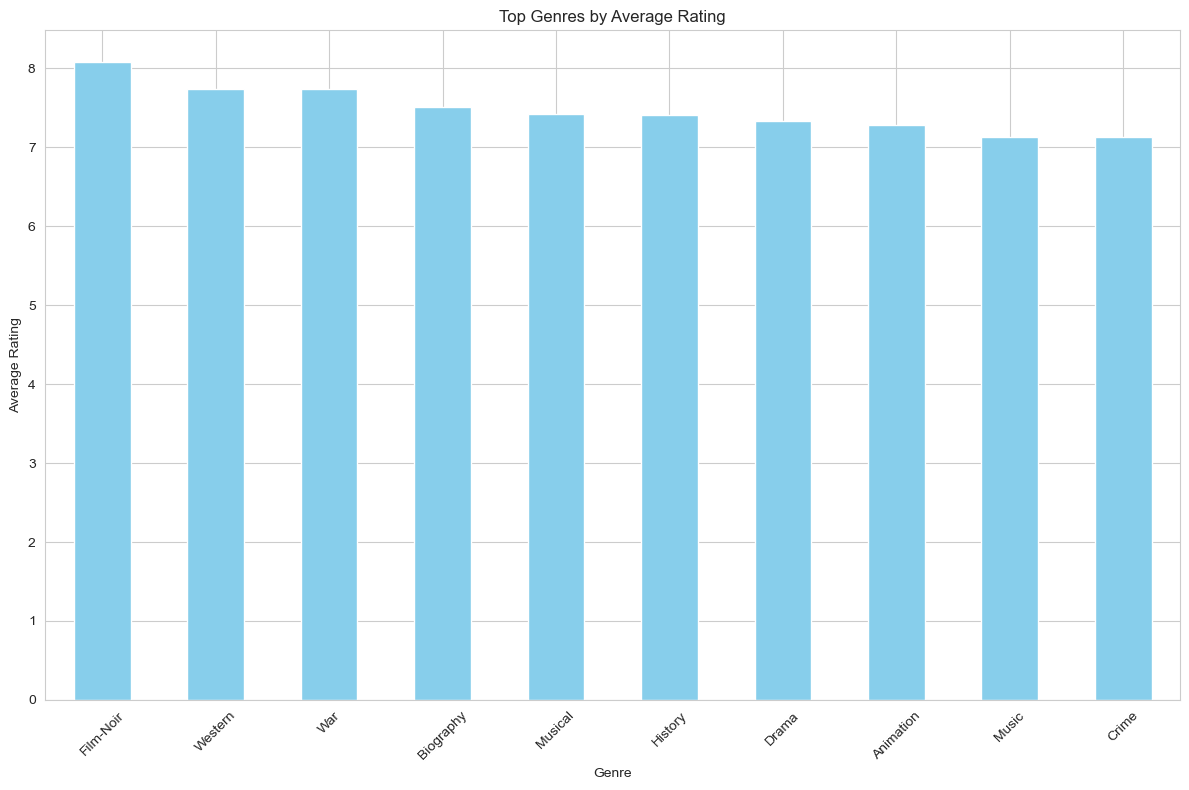

In [35]:
exploded_df = data.explode('Genre')

genre_ratings = exploded_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)


top_n = 10 
genre_ratings.head(top_n).plot(kind='bar', figsize=(12, 8), color='skyblue')


plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


Consistent High Ratings: All the genres shown have high average ratings, which likely means they are well-received by audiences or critics.

Close Range: The average ratings are in a close range, suggesting that no single genre drastically outperforms the others in terms of average rating.

Popularity vs. Rating: This chart does not necessarily reflect the popularity of the genres, but rather how highly they are rated on average.

Representation Issue: The genres might contain varying numbers of movies, which isn't depicted in this type of visualization. A genre with a high average rating but few movies could be overrepresented compared to a genre with many movies and a slightly lower average rating.

## Bar plot to discover genres with the highest Average metascore among movies in the dataset

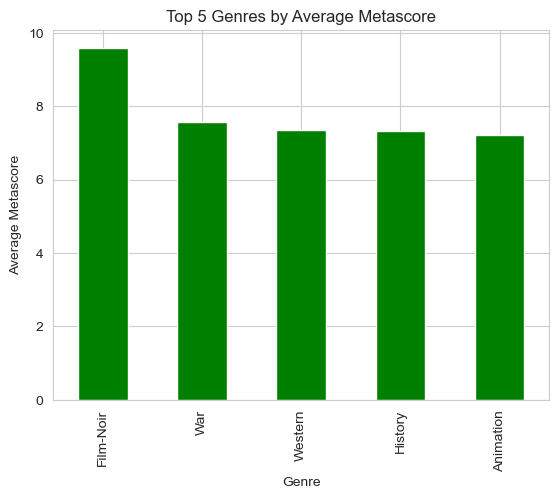

In [37]:

data_exploded = data.explode('Genre')


avg_metascore = data_exploded.groupby('Genre')['Metascore'].mean()

sorted_avg_metascore = avg_metascore.sort_values(ascending=False)


N = 5
top_N_genres = sorted_avg_metascore.head(N)

top_N_genres.plot(kind='bar', title='Top 5 Genres by Average Metascore', color='green')
plt.ylabel('Average Metascore')
plt.show()

Highest Rated Genre: "Film-Noir" appears as the highest-rated genre, suggesting that, on average, films in this genre are critically acclaimed or well-received by critics.

Close Ratings: The genres "War," "Western," "History," and "Animation" have very similar average Metascores. The small differences between the bars indicate that these genres tend to receive comparable critical acclaim.

Range of Metascores: All the genres have high average Metascores, with the lowest among the top genres being close to 7 and the highest above 8. This suggests that movies in these genres are generally rated favorably.

Diversity of Genres: The genres presented cover a diverse range of film types, from the classic "Film-Noir" to modern "Animation." This diversity indicates that critically acclaimed films are not confined to a particular style or era.

Genre Representation: The chart suggests that "Film-Noir," despite being a less common genre today, still holds a place as the top-rated genre in terms of Metascore. It's noteworthy that classic genres like "War" and "Western" continue to be well-regarded, while "History" and "Animation" also receive high critical praise.

## Bar plot to discover genres with the highest total gross among movies in the dataset

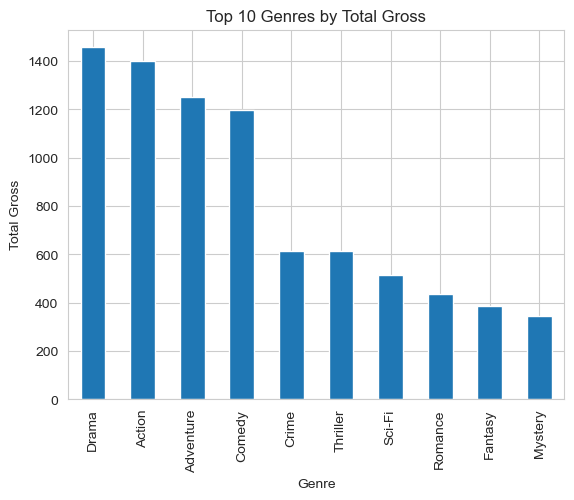

In [38]:
data_exploded = data.explode('Genre')

genre_gross = data_exploded.groupby('Genre')['Gross'].sum()

top_n_genres_by_gross = genre_gross.sort_values(ascending=False).head(10)

top_n_genres_by_gross.plot(kind='bar', title='Top 10 Genres by Total Gross')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.show()

## EDA

<Axes: xlabel='Rating', ylabel='Gross'>

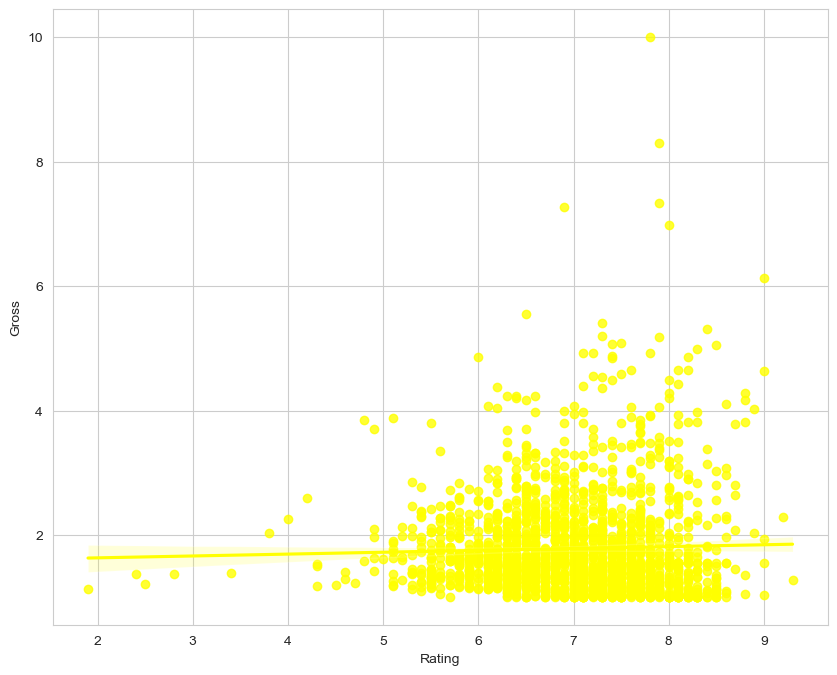

In [54]:
plt.figure(figsize=(10,8))
sns.regplot(x='Rating',y='Gross',data=data,color='yellow')

Density of Data Points: The majority of the data points are clustered at the lower end of the Gross revenue axis, suggesting that most movies do not earn extremely high gross revenues, which is consistent with the industry where a few movies earn the majority of the revenue.

Scatter Distribution: There is a wide scatter in Gross revenue across all IMDb ratings. Movies with mid-range IMDb ratings (around 5 to 8) show a wide variation in Gross revenue, indicating that a moderate IMDb rating does not necessarily predict a movie's financial success.

High Grossing Outliers: There are a few outliers with very high Gross revenues, which appear to be spread across a range of IMDb ratings from around 6 to 9. These are likely blockbuster hits that, regardless of their IMDb rating, managed to achieve significant box office success.

Lack of Strong Correlation: There does not appear to be a strong direct correlation between IMDb ratings and Gross revenue. While there are movies with high ratings that have high Gross revenues, there are also many with high ratings that do not gross as much, and vice versa.

Ratings Concentration: The IMDb ratings are concentrated between approximately 6 and 8, which could indicate that most movies in the dataset are of average to good quality, as perceived by IMDb users.

Rating Threshold for High Gross: There seems to be a threshold IMDb rating (around 6) below which very few movies achieve high gross revenues. Most of the higher grossing movies have a rating above this threshold.

No Clear Trend: There is no clear upward or downward trend in the plot that would suggest higher ratings correspond to higher gross revenues or vice versa.

In summary, the plot suggests that while there may be a general positive trend (movies with higher ratings also tend to have higher gross revenues), there are many exceptions, and the relationship is not strong enough to make definitive predictions about a movie's financial success based solely on its IMDb rating. Other factors not depicted in the scatter plot, such as budget, marketing, genre, and release timing, likely play significant roles in a movie's gross revenue.

<Axes: xlabel='Metascore', ylabel='Gross'>

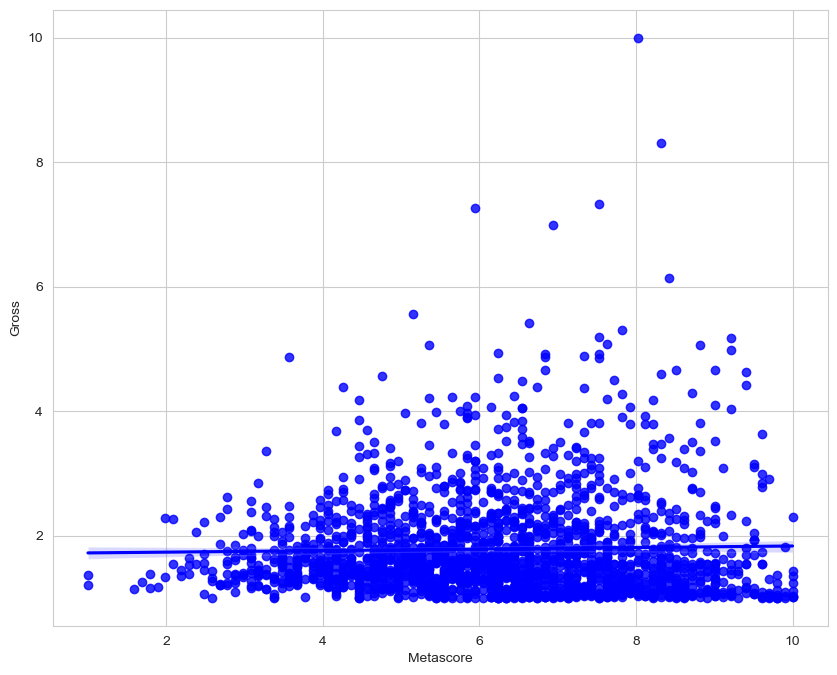

In [55]:
plt.figure(figsize=(10,8))
sns.regplot(x='Metascore',y='Gross',data=data,color='blue')

Weak to No Apparent Correlation: The visualization does not show a clear linear relationship between Gross revenue and Metascore. The data points are widely spread out, indicating that a higher Metascore doesn't consistently align with higher Gross revenue, and vice versa.

High Grossing Films Across Metascores: There are films with a wide range of Metascores that have achieved high Gross revenue. This indicates that factors other than critical acclaim, as measured by Metascore, may have a substantial impact on financial success.

Cluster of Lower Grossing Films: There is a concentration of data points at the lower end of the Gross revenue scale across various Metascores. This means most movies do not achieve enormous box office success regardless of their critical reception.

Outliers: Some films show exceptionally high Gross revenue, which could be attributed to blockbuster status, but these do not necessarily have the highest Metascores. Conversely, some films with high Metascores do not show exceptionally high Gross revenue.

In summary, the relationship between Gross revenue and Metascore in this data appears to be non-linear and weak. Critical acclaim, as assessed by Metascore, is not a guaranteed predictor of financial performance at the box office. The success in terms of revenue is likely influenced by a multitude of factors, including but not limited to, marketing, distribution, audience appeal, star power, and competition at the time of release.

<Axes: xlabel='Runtime', ylabel='Gross'>

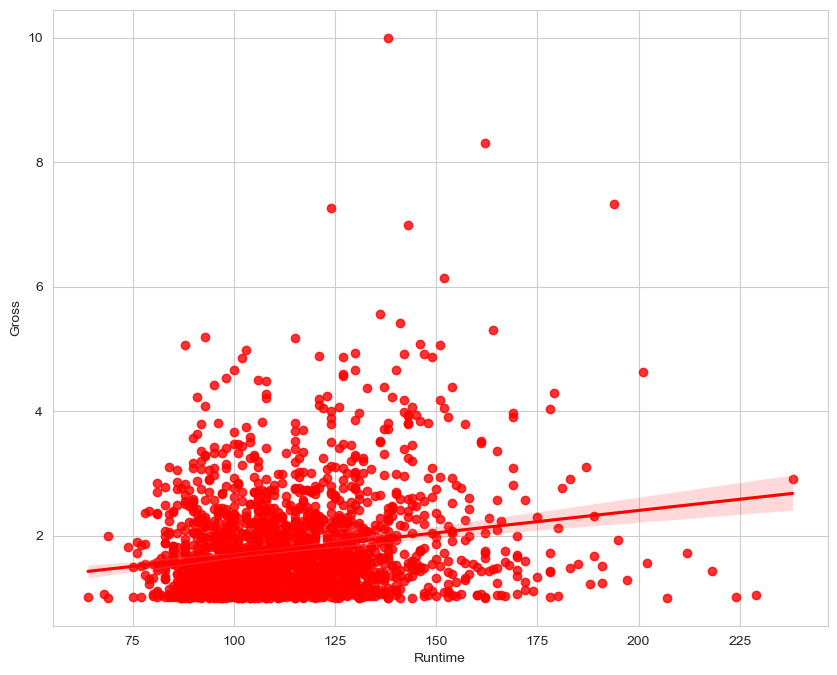

In [56]:
plt.figure(figsize=(10,8))
sns.regplot(x='Runtime',y='Gross',data=data,color='red')

Weak Positive Correlation: The upward slope of the trend line suggests there is a weak positive correlation between runtime and gross. In general, as movies get longer, they might gross slightly more, but this relationship is not strong.

Concentration of Data Points: There is a significant concentration of data points at the lower end of the Gross axis, indicating that most movies have a lower gross revenue. This is typical for the film industry, where a majority of movies do not become blockbuster hits.

Spread of Gross Revenues: For any given runtime, there is a wide spread of gross revenues. This implies that runtime alone is not a strong predictor of a movie's financial success.

Outliers: Some movies with long runtimes appear to have higher gross revenues, indicating that certain longer films can be quite successful. However, there are also long movies that do not gross as much.

High Grossing Short Films: There are also outliers with shorter runtimes that have high gross revenues. These could be highly successful short films or films with significant cultural impact.

Popular Movie Durations: The dense cluster of data points around the 90-120 minute mark corresponds with the typical runtime for feature films and indicates that most movies adhere to this industry standard.

Runtime Limitation for Success: The trend line and data points suggest that there's no strong threshold effect where movies have to be a certain length to achieve higher gross revenue.

The relationship depicted by the trend line is a generalization, and the substantial scatter around it suggests that there are many other factors at play that influence a movie's gross revenue, such as genre, marketing, the presence of star actors, competition at the time of release, and overall market conditions.

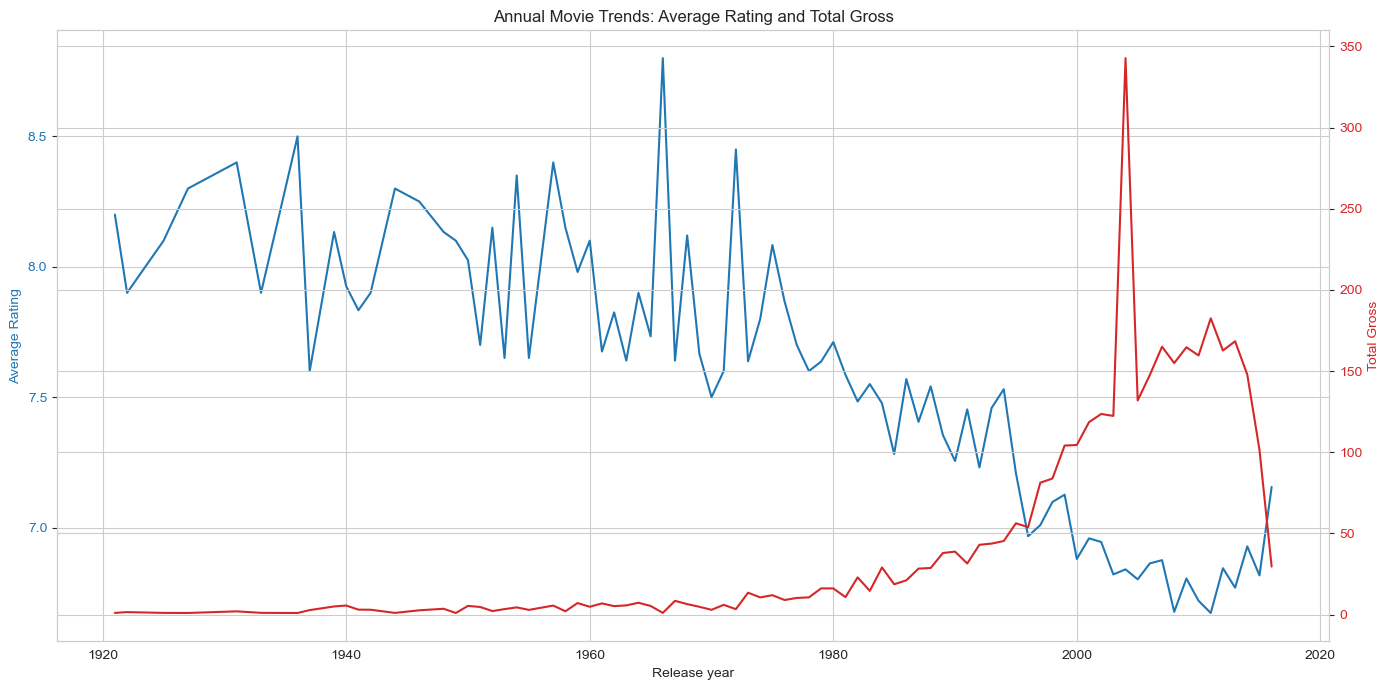

In [39]:
#Annual Movies trends


movie_DF['Release year'] = pd.to_numeric(movie_DF['Release year'], errors='coerce')


annual_stats = movie_DF.groupby('Release year').agg({
    'Rating': 'mean',
    'Gross': 'sum'
})

annual_stats = annual_stats.reset_index()


fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Release year')
ax1.set_ylabel('Average Rating', color=color)
ax1.plot(annual_stats['Release year'], annual_stats['Rating'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  


color = 'tab:red'
ax2.set_ylabel('Total Gross', color=color)  
ax2.plot(annual_stats['Release year'], annual_stats['Gross'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Annual Movie Trends: Average Rating and Total Gross')
fig.tight_layout() 
plt.show()


1- Average Rating Trend: The blue line shows fluctuations in average ratings over time. There are periods, especially mid-century, where average ratings spike, which could correspond to years with highly acclaimed movies. Starting around the 1980s, there's a noticeable downward trend in average ratings.

2- Total Gross Trend: The red line indicates total gross revenue, which generally increases over time. There's a significant spike in gross revenue around the 2010s, followed by a sharp decline. The spike may indicate a year or period with exceptionally high-grossing films, while the decline could be due to incomplete data for recent years, a change in movie consumption patterns, or external factors affecting the film industry.

3- Correlation between Rating and Gross: There doesn't seem to be a strong correlation between the average ratings and total gross revenue. High-grossing years don't necessarily coincide with years that had higher average ratings.



4- The decline in average ratings over the past few decades could indicate either a change in movie production quality, a shift in critical perception, or possibly a larger volume of movies with lower ratings being produced.
5-The sharp increase and subsequent decrease in total gross suggest that external factors (such as the rise of digital streaming platforms, changes in consumer behavior, economic factors, or data availability) might significantly impact box office performance.
6- Data Outliers: The extreme spike in total gross could represent an outlier year with abnormally high revenue, possibly due to blockbuster releases, changes in ticket prices, or the way revenue was reported or collected.